In [ ]:
# Imports the dataset from individual files using Pandas
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 1500)
team = pd.read_csv('Team.csv',sep=",")
player =  pd.read_csv('Player.csv',sep=",",low_memory=False,encoding='ISO-8859-1')
player_match =  pd.read_csv('Player_match.csv',sep=",",low_memory=False,encoding='ISO-8859-1')
match =  pd.read_csv('Match.csv',sep=",",low_memory=False)
ball_by_ball =  pd.read_csv('Ball_By_Ball.csv',sep=",",low_memory=False)

print(ball_by_ball.shape)

(25386, 48)


In [ ]:
team.dtypes

Team_SK       int64
Team_Id       int64
Team_Name    object
dtype: object

In [ ]:
team['Team_Name'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions'], dtype=object)

# **Exploratory Data Analysis**

In [ ]:
ball_by_ball.head(2)

,MatcH_id,Over_id,Ball_id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Extra_Type,Runs_Scored,Extra_runs,Wides,Legbyes,Byes,Noballs,Penalty,Bowler_Extras,Out_type,Caught,Bowled,Run_out,LBW,Retired_hurt,Stumped,caught_and_bowled,hit_wicket,ObstructingFeild,Bowler_Wicket,Match_Date,Season,Striker,Non_Striker,Bowler,Player_Out,Fielders,Striker_match_SK,StrikerSK,NonStriker_match_SK,NONStriker_SK,Fielder_match_SK,Fielder_SK,Bowler_match_SK,BOWLER_SK,PlayerOut_match_SK,BattingTeam_SK,BowlingTeam_SK,Keeper_Catch,Player_out_sk,MatchDateSK
0,598028,15,6,1,5,2,6.0,No Extras,4,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,4/20/2013,2013,277,104,83,NaN,NaN,20336,276,20333,103,-1.0,-1.0,20343.0,82.0,-1.0,4.0,1.0,0.0,0.0,20130420.0
1,598028,14,1,1,5,2,5.0,No Extras,1,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,4/20/2013,2013,104,6,346,NaN,NaN,20333,103,20328,5,-1.0,-1.0,20348.0,345.0,-1.0,4.0,1.0,0.0,0.0,20130420.0


In [ ]:
team[team.isnull().any(axis=1)]

,Team_SK,Team_Id,Team_Name


There are no null values in data set team file

In [ ]:
player.shape

(497, 7)

In [ ]:
a=player[player.isnull().any(axis=1)]
a.shape

(46, 7)

There are total 46 NAN and null  values in data set player file. This is from Bowling skill column.

In [ ]:
player_match.shape

(13992, 22)

In [ ]:
player_match[player_match.isnull().any(axis=1)]

,Player_match_SK,PlayerMatch_key,Match_Id,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name,Role_Desc,Player_team,Opposit_Team,Season_year,is_manofThematch,Age_As_on_match,IsPlayers_Team_won,Batting_Status,Bowling_Status,Player_Captain,Opposit_captain,Player_keeper,Opposit_keeper
0,12694,3.359870e+10,335987,6,R Dravid,01/11/1973,Right-hand bat,Right-arm offbreak,India,Captain,Royal Challengers Bangalore,Kolkata Knight Riders,2008,0,35,0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
1,12695,3.359870e+10,335987,7,W Jaffer,2/16/1978,Right-hand bat,Right-arm offbreak,India,Player,Royal Challengers Bangalore,Kolkata Knight Riders,2008,0,30,0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
2,12696,3.359870e+10,335987,8,V Kohli,11/05/1988,Right-hand bat,Right-arm medium,India,Player,Royal Challengers Bangalore,Kolkata Knight Riders,2008,0,20,0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
3,12697,3.359870e+10,335987,9,JH Kallis,10/16/1975,Right-hand bat,Right-arm fast-medium,South Africa,Player,Royal Challengers Bangalore,Kolkata Knight Riders,2008,0,33,0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
4,12698,3.359870e+10,335987,10,CL White,8/18/1983,Right-hand bat,Legbreak googly,Australia,Player,Royal Challengers Bangalore,Kolkata Knight Riders,2008,0,25,0,NaN,NaN,R Dravid,SC Ganguly,MV Boucher,WP Saha
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13987,26681,1.080000e+11,1082650,413,KH Pandya,3/24/1991,Left-hand bat,Slow left-arm orthodox,India,Player,Mumbai Indians,Rising Pune Supergiants,2017,1,26,1,NaN,NaN,RG Sharma,SPD Smith,PA Patel,MS Dhoni
13988,26682,1.080000e+11,1082650,430,A Zampa,3/31/1992,Right-hand bat,Legbreak googly,Australia,Player,Rising Pune Supergiants,Mumbai Indians,2017,0,25,0,NaN,NaN,SPD Smith,RG Sharma,MS Dhoni,PA Patel
13989,26683,1.080000e+11,1082650,483,LH Ferguson,6/13/1991,Right-hand bat,Right-arm fast,New Zealand,Player,Rising Pune Supergiants,Mumbai Indians,2017,0,26,0,NaN,NaN,SPD Smith,RG Sharma,MS Dhoni,PA Patel
13990,26684,1.080000e+11,1082650,488,RA Tripathi,03/02/1991,Right-hand bat,Right-arm medium,India,Player,Rising Pune Supergiants,Mumbai Indians,2017,0,26,0,NaN,NaN,SPD Smith,RG Sharma,MS Dhoni,PA Patel


All rows have null values in most of the columns in player_match file

In [ ]:
match.shape

(637, 17)

In [ ]:
match[match.isnull().any(axis=1)]

,Match_SK,match_id,Team1,Team2,match_date,Season_Year,Venue_Name,City_Name,Country_Name,Toss_Winner,match_winner,Toss_Name,Win_Type,Outcome_Type,ManOfMach,Win_Margin,Country_id
66,66,392195,Kolkata Knight Riders,Rajasthan Royals,4/23/2009,2009,Newlands,Cape Town,South Africa,Kolkata Knight Riders,Rajasthan Royals,field,Tie,Superover,YK Pathan,NaN,2
130,130,419126,Chennai Super Kings,Kings XI Punjab,3/21/2010,2010,"MA Chidambaram Stadium, Chepauk",Chennai,India,Chennai Super Kings,Kings XI Punjab,field,Tie,Superover,J Theron,NaN,1
241,241,501270,Delhi Daredevils,Pune Warriors,5/21/2011,2011,Feroz Shah Kotla,Delhi,India,Delhi Daredevils,NaN,bat,NO Result,No Result,NaN,NaN,1
328,328,598009,Sunrisers Hyderabad,Royal Challengers Bangalore,4/7/2013,2013,"Rajiv Gandhi International Stadium, Uppal",Hyderabad,India,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,Tie,Superover,GH Vihari,NaN,1
341,341,598022,Royal Challengers Bangalore,Delhi Daredevils,4/16/2013,2013,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Tie,Superover,V Kohli,NaN,1
416,416,729320,Kolkata Knight Riders,Rajasthan Royals,4/29/2014,2014,Sheikh Zayed Stadium,Abu Dhabi,U.A.E,Rajasthan Royals,Rajasthan Royals,bat,Tie,Superover,JP Faulkner,NaN,3
476,476,829746,Rajasthan Royals,Kings XI Punjab,4/21/2015,2015,"Sardar Patel Stadium, Motera",Ahmedabad,India,Kings XI Punjab,Kings XI Punjab,field,Tie,Superover,SE Marsh,NaN,1
486,486,829768,Royal Challengers Bangalore,Rajasthan Royals,4/29/2015,2015,M Chinnaswamy Stadium,Bangalore,India,Rajasthan Royals,NaN,field,NO Result,No Result,NaN,NaN,1
511,511,829818,Royal Challengers Bangalore,Delhi Daredevils,5/17/2015,2015,M Chinnaswamy Stadium,Bangalore,India,Royal Challengers Bangalore,NaN,field,NO Result,No Result,NaN,NaN,1
605,605,1082619,Royal Challengers Bangalore,Sunrisers Hyderabad,4/25/2017,2017,NaN,Bengaluru,India,NaN,abandoned,NaN,NaN,abandoned,NaN,0.0,1


There are 11 rows has null values in win Margin column mostly in match file

In [ ]:
ball_by_ball[ball_by_ball.isnull().any(axis=1)]

,MatcH_id,Over_id,Ball_id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Extra_Type,Runs_Scored,Extra_runs,Wides,Legbyes,Byes,Noballs,Penalty,Bowler_Extras,Out_type,Caught,Bowled,Run_out,LBW,Retired_hurt,Stumped,caught_and_bowled,hit_wicket,ObstructingFeild,Bowler_Wicket,Match_Date,Season,Striker,Non_Striker,Bowler,Player_Out,Fielders,Striker_match_SK,StrikerSK,NonStriker_match_SK,NONStriker_SK,Fielder_match_SK,Fielder_SK,Bowler_match_SK,BOWLER_SK,PlayerOut_match_SK,BattingTeam_SK,BowlingTeam_SK,Keeper_Catch,Player_out_sk,MatchDateSK
0,598028,15,6,1,5,2,6.0,No Extras,4,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,4/20/2013,2013,277,104,83,NaN,NaN,20336,276,20333,103,-1.0,-1.0,20343.0,82.0,-1.0,4.0,1.0,0.0,0.0,20130420.0
1,598028,14,1,1,5,2,5.0,No Extras,1,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,4/20/2013,2013,104,6,346,NaN,NaN,20333,103,20328,5,-1.0,-1.0,20348.0,345.0,-1.0,4.0,1.0,0.0,0.0,20130420.0
2,598028,14,2,1,5,2,3.0,No Extras,1,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,4/20/2013,2013,6,104,346,NaN,NaN,20328,5,20333,103,-1.0,-1.0,20348.0,345.0,-1.0,4.0,1.0,0.0,0.0,20130420.0
3,598028,14,3,1,5,2,5.0,No Extras,1,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,4/20/2013,2013,104,6,346,NaN,NaN,20333,103,20328,5,-1.0,-1.0,20348.0,345.0,-1.0,4.0,1.0,0.0,0.0,20130420.0
4,598028,14,4,1,5,2,3.0,No Extras,0,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,4/20/2013,2013,6,104,346,NaN,NaN,20328,5,20333,103,-1.0,-1.0,20348.0,345.0,-1.0,4.0,1.0,0.0,0.0,20130420.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25380,336037,14,1,1,7,6,4.0,No Extras,2,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,5/24/2008,2008,46,44,136,NaN,NaN,13784,45,13783,43,-1.0,-1.0,13781.0,135.0,-1.0,6.0,5.0,0.0,0.0,20080524.0
25381,336037,14,2,1,7,6,4.0,No Extras,1,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,5/24/2008,2008,46,44,136,NaN,NaN,13784,45,13783,43,-1.0,-1.0,13781.0,135.0,-1.0,6.0,5.0,0.0,0.0,20080524.0
25383,336037,14,4,1,7,6,4.0,No Extras,1,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,5/24/2008,2008,46,48,136,NaN,NaN,13784,45,13786,47,-1.0,-1.0,13781.0,135.0,-1.0,6.0,5.0,0.0,0.0,20080524.0
25384,336037,14,5,1,7,6,5.0,No Extras,0,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,5/24/2008,2008,48,46,136,NaN,NaN,13786,47,13784,45,-1.0,-1.0,13781.0,135.0,-1.0,6.0,5.0,0.0,0.0,20080524.0


In [ ]:
ball_by_ball.shape

(25386, 48)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
ball_by_ball.hist

<bound method hist_frame of        MatcH_id  Over_id  Ball_id  Innings_No Team_Batting Team_Bowling  \
0        598028       15        6           1            5            2   
1        598028       14        1           1            5            2   
2        598028       14        2           1            5            2   
3        598028       14        3           1            5            2   
4        598028       14        4           1            5            2   
...         ...      ...      ...         ...          ...          ...   
25381    336037       14        2           1            7            6   
25382    336037       14        3           1            7            6   
25383    336037       14        4           1            7            6   
25384    336037       14        5           1            7            6   
25385    336037       14        6           1            7            6   

       Striker_Batting_Position Extra_Type  Runs_Scored  Extra_runs  Wi

In [ ]:
# Look at the correlation matrix
corrmat3 = ball_by_ball.corr()
round(corrmat3,3)

,MatcH_id,Over_id,Ball_id,Innings_No,Striker_Batting_Position,Runs_Scored,Extra_runs,Wides,Legbyes,Byes,Noballs,Penalty,Bowler_Extras,Caught,Bowled,Run_out,LBW,Retired_hurt,Stumped,caught_and_bowled,hit_wicket,ObstructingFeild,Bowler_Wicket,Season,Striker,Non_Striker,Bowler,Player_Out,Fielders,Striker_match_SK,StrikerSK,NonStriker_match_SK,NONStriker_SK,Fielder_match_SK,Fielder_SK,Bowler_match_SK,BOWLER_SK,PlayerOut_match_SK,BattingTeam_SK,BowlingTeam_SK,Keeper_Catch,Player_out_sk,MatchDateSK
MatcH_id,1.000,0.017,-0.003,-0.030,0.007,0.023,-0.016,-0.008,-0.006,-0.008,-0.014,-0.009,-0.012,0.001,-0.001,-0.001,0.010,0.000,0.001,-0.004,-0.009,NaN,0.002,0.980,0.425,0.408,0.494,0.406,0.424,0.973,0.425,0.973,0.408,0.038,0.052,0.973,0.494,0.047,0.242,0.172,0.026,0.069,0.980
Over_id,0.017,1.000,-0.014,-0.050,0.636,0.080,-0.011,-0.021,-0.009,0.011,0.025,0.002,-0.013,0.056,0.029,0.063,-0.005,-0.002,0.008,0.007,0.009,NaN,0.061,0.020,0.091,0.097,-0.016,0.074,-0.002,0.021,0.091,0.021,0.097,0.073,0.059,0.021,-0.016,0.077,0.000,0.017,-0.001,0.010,0.020
Ball_id,-0.003,-0.014,1.000,0.002,0.039,0.005,-0.000,-0.007,0.000,0.012,0.001,0.008,-0.007,-0.005,0.011,0.019,-0.000,0.004,0.000,0.012,-0.006,NaN,0.004,-0.004,0.005,-0.002,0.004,0.015,0.031,-0.004,0.005,-0.004,-0.002,0.003,0.006,-0.003,0.004,0.010,0.001,-0.005,-0.000,-0.001,-0.004
Innings_No,-0.030,-0.050,0.002,1.000,-0.013,-0.004,0.006,0.015,-0.013,0.003,0.006,0.006,0.016,-0.004,0.006,-0.011,-0.006,0.003,-0.004,0.001,0.006,NaN,-0.002,-0.039,0.011,0.033,-0.018,-0.015,-0.070,-0.038,0.011,-0.038,0.033,-0.011,-0.015,-0.038,-0.018,-0.007,-0.016,-0.062,0.008,0.017,-0.039
Striker_Batting_Position,0.007,0.636,0.039,-0.013,1.000,-0.024,-0.005,-0.016,-0.003,0.020,0.012,-0.005,-0.012,0.033,0.024,0.059,0.008,-0.004,-0.000,0.001,0.016,NaN,0.041,0.002,0.165,0.121,0.002,0.160,-0.027,0.000,0.165,0.000,0.121,0.048,0.037,0.000,0.002,0.056,0.040,-0.038,NaN,NaN,0.002
Runs_Scored,0.023,0.080,0.005,-0.004,-0.024,1.000,-0.148,-0.115,-0.089,-0.034,-0.007,-0.005,-0.112,-0.129,-0.078,-0.037,-0.041,-0.004,-0.031,-0.027,-0.005,NaN,-0.164,0.018,0.007,0.015,0.009,0.041,0.025,0.020,0.007,0.020,0.015,-0.134,-0.105,0.020,0.009,-0.164,-0.006,0.017,-0.011,-0.030,0.018
Extra_runs,-0.016,-0.011,-0.000,0.006,-0.005,-0.148,1.000,0.716,0.559,0.317,0.207,0.087,0.747,-0.034,-0.021,-0.008,-0.011,-0.002,0.000,-0.007,-0.001,NaN,-0.042,-0.018,-0.006,-0.004,-0.001,-0.006,-0.030,-0.017,-0.006,-0.017,-0.004,-0.033,-0.027,-0.017,-0.001,-0.042,0.004,-0.022,-0.003,-0.008,-0.018
Wides,-0.008,-0.021,-0.007,0.015,-0.016,-0.115,0.716,1.000,-0.017,-0.007,-0.008,-0.001,0.958,-0.025,-0.015,-0.004,-0.008,-0.002,0.005,-0.005,-0.001,NaN,-0.030,-0.010,-0.010,0.004,-0.002,-0.027,-0.040,-0.009,-0.010,-0.009,0.004,-0.023,-0.019,-0.009,-0.002,-0.029,0.007,-0.017,-0.002,-0.006,-0.010
Legbyes,-0.006,-0.009,0.000,-0.013,-0.003,-0.089,0.559,-0.017,1.000,-0.005,-0.006,-0.001,-0.019,-0.020,-0.012,-0.008,-0.006,-0.001,-0.005,-0.004,-0.001,NaN,-0.025,-0.008,0.004,-0.005,0.001,NaN,NaN,-0.008,0.004,-0.008,-0.005,-0.021,-0.017,-0.008,0.001,-0.026,0.002,-0.018,-0.002,-0.005,-0.008
Byes,-0.008,0.011,0.012,0.003,0.020,-0.034,0.317,-0.007,-0.005,1.000,-0.002,-0.000,-0.007,-0.007,-0.004,-0.003,-0.002,-0.000,-0.002,-0.002,-0.000,NaN,-0.009,-0.006,0.002,-0.008,-0.004,NaN,NaN,-0.007,0.002,-0.007,-0.008,-0.008,-0.006,-0.007,-0.004,-0.010,-0.009,0.004,-0.001,-0.002,-0.006


In [ ]:
corrmat4 = match.corr()
round(corrmat4,3)

,Match_SK,match_id,Season_Year,Win_Margin,Country_id
Match_SK,1.000,0.968,0.994,-0.018,-0.188
match_id,0.968,1.000,0.976,-0.027,-0.157
Season_Year,0.994,0.976,1.000,-0.019,-0.180
Win_Margin,-0.018,-0.027,-0.019,1.000,-0.006
Country_id,-0.188,-0.157,-0.180,-0.006,1.000


In [ ]:
match.describe()

,Match_SK,match_id,Season_Year,Win_Margin,Country_id
count,637.000000,6.370000e+02,637.000000,628.000000,637.000000
mean,318.000000,6.378825e+05,2012.497645,17.272293,1.152276
std,184.030342,2.356312e+05,2.776600,22.212632,0.438388
min,0.000000,3.359870e+05,2008.000000,0.000000,1.000000
25%,159.000000,4.191550e+05,2010.000000,6.000000,1.000000
50%,318.000000,5.483830e+05,2012.000000,8.000000,1.000000
75%,477.000000,8.297480e+05,2015.000000,20.000000,1.000000
max,636.000000,1.082650e+06,2017.000000,146.000000,3.000000


In [ ]:
ball_by_ball.describe()

,MatcH_id,Over_id,Ball_id,Innings_No,Striker_Batting_Position,Runs_Scored,Extra_runs,Wides,Legbyes,Byes,Noballs,Penalty,Bowler_Extras,Caught,Bowled,Run_out,LBW,Retired_hurt,Stumped,caught_and_bowled,hit_wicket,ObstructingFeild,Bowler_Wicket,Season,Striker,Non_Striker,Bowler,Player_Out,Fielders,Striker_match_SK,StrikerSK,NonStriker_match_SK,NONStriker_SK,Fielder_match_SK,Fielder_SK,Bowler_match_SK,BOWLER_SK,PlayerOut_match_SK,BattingTeam_SK,BowlingTeam_SK,Keeper_Catch,Player_out_sk,MatchDateSK
count,2.538600e+04,25386.000000,25386.000000,25386.000000,24233.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,25386.0,25386.000000,25386.000000,25386.000000,25386.000000,25386.000000,1243.000000,874.000000,25386.000000,25386.000000,25386.000000,25386.000000,25385.000000,25385.000000,25385.000000,25385.000000,25385.000000,25385.000000,25385.000000,25385.000000,25385.000000,2.538500e+04
mean,6.523610e+05,10.094068,3.620499,1.532341,3.527174,1.225124,0.072599,0.039195,0.023832,0.005121,0.004254,0.000197,0.043449,0.027811,0.010242,0.005042,0.002876,0.000118,0.001615,0.001221,0.000039,0.0,0.043804,2012.612779,143.119751,143.130860,193.531907,155.393403,151.673913,19869.100213,142.119751,19869.113054,142.130860,674.394209,4.222100,19871.917195,192.534174,971.297105,5.093480,4.102029,0.000197,0.523656,2.012659e+07
std,2.320103e+05,5.630460,1.811524,0.498963,2.147387,1.603134,0.356885,0.260603,0.205171,0.115958,0.077772,0.031381,0.271347,0.164433,0.100685,0.070830,0.053549,0.010870,0.040156,0.034924,0.006276,0.0,0.204662,2.771699,121.153441,120.757643,134.227512,125.971205,125.212809,4025.036620,121.153441,4024.918613,120.757643,3675.493547,36.111194,4024.508579,134.229670,4378.699958,3.574591,3.170276,0.014033,14.141503,2.771760e+04
min,3.359890e+05,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2008.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12738.000000,0.000000,12738.000000,0.000000,-1.000000,-1.000000,12750.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,2.008042e+07
25%,5.012120e+05,5.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2011.000000,42.000000,42.000000,73.000000,46.000000,46.000000,16754.000000,41.000000,16754.000000,41.000000,-1.000000,-1.000000,16744.000000,72.000000,-1.000000,1.000000,2.000000,0.000000,0.000000,2.011041e+07
50%,5.980060e+05,10.000000,4.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2013.000000,97.000000,97.000000,175.000000,110.000000,109.000000,19847.000000,96.000000,19847.000000,96.000000,-1.000000,-1.000000,19861.000000,174.000000,-1.000000,5.000000,3.000000,0.000000,0.000000,2.013041e+07
75%,8.297700e+05,15.000000,5.000000,2.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,2015.000000,221.000000,221.000000,314.000000,254.000000,237.000000,23425.000000,220.000000,23425.000000,220.000000,-1.000000,-1.000000,23413.000000,313.000000,-1.000000,7.000000,6.000000,0.000000,0.000000,2.015050e+07
max,1.082649e+06,20.000000,9.000000,2.000000,11.000000,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,2017.000000,477.000000,477.000000,497.000000,472.000000,497.000000,26662.000000,476.000000,26662.000000,476.000000,26656.000000,496.000000,26658.000000,496.000000,26660.000000,12.000000,12

In [ ]:
player['DOB'].describe()

count           497
unique          482
top       4/30/1987
freq              3
Name: DOB, dtype: object

In [ ]:
player.head()

,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
0,0,1,SC Ganguly,07/08/1972,Left-hand bat,Right-arm medium,India
1,1,2,BB McCullum,9/27/1981,Right-hand bat,Right-arm medium,New Zealand
2,2,3,RT Ponting,12/19/1974,Right-hand bat,Right-arm medium,Australia
3,3,4,DJ Hussey,7/15/1977,Right-hand bat,Right-arm offbreak,Australia
4,4,5,Mohammad Hafeez,10/17/1980,Right-hand bat,Right-arm offbreak,Pakistan


In [ ]:
player['Country_Name'].unique()

array(['India', 'New Zealand', 'Australia', 'Pakistan', 'South Africa',
       'Sri Lanka', 'West Indies', 'Zimbabwea', 'England', 'Bangladesh',
       'Netherlands', 'Afghanistan'], dtype=object)

In [ ]:
player.groupby('Country_Name').size().sort_values(ascending=False)

Country_Name
India           277
Australia        74
South Africa     40
New Zealand      25
West Indies      20
Sri Lanka        20
England          18
Pakistan         13
Bangladesh        5
Zimbabwea         2
Afghanistan       2
Netherlands       1
dtype: int64

In [ ]:
# Find No of lables against each attributes in the file
for col in player:
    print(col,':',len(player[col].unique()), 'labels')

PLAYER_SK : 497 labels
Player_Id : 497 labels
Player_Name : 497 labels
DOB : 482 labels
Batting_hand : 5 labels
Bowling_skill : 21 labels
Country_Name : 12 labels


In [ ]:
for col in match:
    print(col)

Match_SK
match_id
Team1
Team2
match_date
Season_Year
Venue_Name
City_Name
Country_Name
Toss_Winner
match_winner
Toss_Name
Win_Type
Outcome_Type
ManOfMach
Win_Margin
Country_id


In [ ]:
player['Batting_hand'].unique()

array(['Left-hand bat', 'Right-hand bat', 'Right-handed',
       '\xa0Right-hand bat', '\xa0Left-hand bat'], dtype=object)

There should be only 2 lables in Batting_hand attribute but its typo characters make 5 labels instead of 2

In [ ]:
player.groupby('Batting_hand').size().sort_values(ascending=False)

Batting_hand
Right-hand bat     360
Left-hand bat      131
 Right-hand bat      4
 Left-hand bat       1
Right-handed         1
dtype: int64

In [ ]:
player.head()

,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
0,0,1,SC Ganguly,07/08/1972,Left-hand bat,Right-arm medium,India
1,1,2,BB McCullum,9/27/1981,Right-hand bat,Right-arm medium,New Zealand
2,2,3,RT Ponting,12/19/1974,Right-hand bat,Right-arm medium,Australia
3,3,4,DJ Hussey,7/15/1977,Right-hand bat,Right-arm offbreak,Australia
4,4,5,Mohammad Hafeez,10/17/1980,Right-hand bat,Right-arm offbreak,Pakistan


**Slice and Dice the Data**




In [ ]:
player[player['Player_Name'].str.contains('Dhoni')]

,PLAYER_SK,Player_Id,Player_Name,DOB,Batting_hand,Bowling_skill,Country_Name
19,19,20,MS Dhoni,07/07/1981,Right-hand bat,Right-arm medium,India


In [ ]:
dho=ball_by_ball[ball_by_ball['Striker'] == 20 ]
dho.groupby('Team_Batting').size().sort_values(ascending=False)


Team_Batting
3     39
12    30
dtype: int64

In [ ]:
dho['Runs_Scored'].sum()

100

In [ ]:
dho.groupby('Runs_Scored').size().sort_values(ascending=False)

Runs_Scored
1    28
0    21
2     9
4     6
6     5
dtype: int64

In [ ]:
dho.groupby('Season').size().sort_values(ascending=True)

Season
2016    30
2014    39
dtype: int64

In [ ]:
runs=dho.groupby(['Season']).sum()
runs['Runs_Scored']

Season
2014    48
2016    52
Name: Runs_Scored, dtype: int64

In [ ]:
dho.head()

,MatcH_id,Over_id,Ball_id,Innings_No,Team_Batting,Team_Bowling,Striker_Batting_Position,Extra_Type,Runs_Scored,Extra_runs,Wides,Legbyes,Byes,Noballs,Penalty,Bowler_Extras,Out_type,Caught,Bowled,Run_out,LBW,Retired_hurt,Stumped,caught_and_bowled,hit_wicket,ObstructingFeild,Bowler_Wicket,Match_Date,Season,Striker,Non_Striker,Bowler,Player_Out,Fielders,Striker_match_SK,StrikerSK,NonStriker_match_SK,NONStriker_SK,Fielder_match_SK,Fielder_SK,Bowler_match_SK,BOWLER_SK,PlayerOut_match_SK,BattingTeam_SK,BowlingTeam_SK,Keeper_Catch,Player_out_sk,MatchDateSK
4400,980954,14,7,1,12,13,4.0,No Extras,1,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,4/29/2016,2016,20,306,71,NaN,NaN,24607,19,24615,305,-1.0,-1.0,24600.0,70.0,-1.0,11.0,12.0,0.0,0.0,20160429.0
4401,980954,15,1,1,12,13,4.0,No Extras,2,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,4/29/2016,2016,20,306,35,NaN,NaN,24607,19,24615,305,-1.0,-1.0,24599.0,34.0,-1.0,11.0,12.0,0.0,0.0,20160429.0
4402,980954,15,2,1,12,13,4.0,No Extras,1,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,4/29/2016,2016,20,306,35,NaN,NaN,24607,19,24615,305,-1.0,-1.0,24599.0,34.0,-1.0,11.0,12.0,0.0,0.0,20160429.0
4408,980954,19,2,1,12,13,4.0,No Extras,4,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,4/29/2016,2016,20,306,14,NaN,NaN,24607,19,24615,305,-1.0,-1.0,24597.0,13.0,-1.0,11.0,12.0,0.0,0.0,20160429.0
4409,980954,19,3,1,12,13,4.0,No Extras,1,0,0,0,0,0,0,0,Not Applicable,0,0,0,0,0,0,0,0,0,0,4/29/2016,2016,20,306,14,NaN,NaN,24607,19,24615,305,-1.0,-1.0,24597.0,13.0,-1.0,11.0,12.0,0.0,0.0,20160429.0


# **Visual Data Analysis**

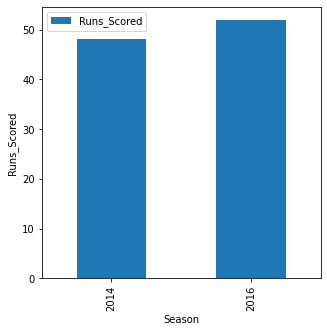

In [ ]:
##Bargraph for Player scores against each seasons
D=dho.groupby('Season').agg({'Runs_Scored':'sum'})
fig, ax = plt.subplots(figsize=(5,5))
plt.ylabel("Runs_Scored")
D.plot(kind='bar',ax=ax)

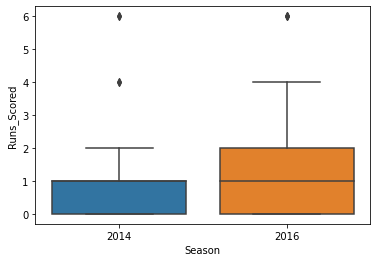

In [ ]:
ax = sns.boxplot(x="Season", y="Runs_Scored", data=dho, linewidth=1.5)

In [ ]:
# Visualise the dta using plotly which has dynamic view for all players
import plotly.express as px

fig = px.box(ball_by_ball, x="Season", y="Runs_Scored")
fig.show()